# TensorFlow 

## 计算图

首先声明张量和占位符，然后传入图操作
工作原理：
* 首先数据集和计算图操作
* 然后传入数据
* 打印返回值

In [5]:
import numpy as np
import tensorflow as tf
sess=tf.Session()

x_vals = np.array([x for x in range(1,10,2)])
x_data = tf.placeholder(tf.int32)
m_const = tf.constant(3)
my_product = tf.multiply(x_data,m_const)

for x_val in x_vals:
    sess.run(my_product,feed_dict = {x_data: x_val})

## Tensorflow的嵌入Layer

* 首先创建数据和占位符

In [9]:
m = np.array([[1.,3.,5.,7.,9.],
              [-2.,0.,2.,4.,6.],
              [-6.,-3.,0.,3.,6.]])
x = np.array([m,m+1])
x_data = tf.placeholder(tf.float32,shape=(3, 5))

* 创建矩阵乘法和加法要用到的常量矩阵

In [10]:
m1 = tf.constant([1.,0.,-1.,2.,4.],shape=(5,1))
m2 = tf.constant([2.],shape=(1,1))
a1 = tf.constant([10.,11.,12.],shape=(3,1))

* 声明操作，表示成计算图

In [11]:
prod = tf.matmul(x_data, m1)
prod1 = tf.matmul(prod, m2)
add1 = tf.add(prod1,a1)

* 通过计算图赋值

In [13]:
for i in x:
    sess.run(add1, feed_dict={x_data:i})

## Tensorflow的多层Layer
* 首先创建2D图像，4*4像素,并创建占位符

In [14]:
x_shape = [1,4,4,1]
x = np.random.uniform(size=x_shape)
x_data = tf.placeholder(tf.float32, shape=x_shape)

* 创建4*4的像素图片的滑动窗口 conv2d传入滑动窗口、过滤器和步长。

In [16]:
_filter = tf.constant(0.25,shape=[2,2,1,1])
_strides = [1,2,2,1]
avg_layer = tf.nn.conv2d(x_data,_filter,_strides,
                        padding='SAME',name='avg_window')

* 自定义一个Layer：

    将输入张量乘以一个2*2的矩阵张量，然后每个元素加1。
    裁剪

In [30]:
def custom_layer(input_matrix):
    input_matrix_sqeezed = tf.squeeze(input_matrix)
    w = tf.constant([[ 1., 2.],[-1.,3.]])
    b = tf.constant(1., shape=[2,2])
    temp = tf.matmul(w,input_matrix_sqeezed)
    temp = tf.add(temp, b)
    return tf.sigmoid(temp)

* 将新定义的Layer加入到计算图中

In [35]:
with tf.name_scope('custom_layer') as scope:
    _custom_layer = custom_layer(avg_layer)

* 执行计算图

In [34]:
sess.run(_custom_layer, feed_dict={x_data:x})

array([[0.9505035 , 0.93600875],
       [0.90473413, 0.92071646]], dtype=float32)

# Tensorflow 实现损失函数
## base

In [175]:
import tensorflow as tf
import matplotlib.pyplot as plt

* x预测序列是-1到1之间的等差数列

In [176]:
x = tf.linspace(-1.,1.,50)
target = tf.constant(0.)

### 1 L2正则损失函数（欧拉损失函数）：

预测值与目标值的平方和。L2正则有优势在与在目标值附件有更好的曲度</p>
机器学习算法利用这点收敛并且离目标越近收敛越慢。

In [177]:
mL2 = tf.square(target-x)
mL2_out = sess.run(mL2)

In [178]:
nL2 = tf.nn.l2_loss(target-x)
nL2_out = sess.run(nL2)

### 2 L1正则损失函数-绝对值损失函数

L1正则损失对差值求绝对值</p>
L1正则在目标值附件不平滑，这会导致算法不能很好的收敛

In [185]:
L1 = tf.abs(target-x)
L1_out = sess.run(L1)

### 3 Pseudo-Huber损失函数

利用L1和L2正则消减极值处的陡峭，使得目标值附近连续</p>
它的表达式依赖参数delta。

In [172]:
delta_1 = tf.constant(0.25)
PHuber_y = tf.multiply(tf.square(delta_1),tf.sqrt(1. +
                    tf.square((target-x)/ delta_1)) -1.)
PHuber_out = sess.run(PHuber_y)

4.2497315

In [173]:
delta_2 = tf.constant(0.5)
PHuber_2_y = tf.multiply(tf.square(delta_2),tf.sqrt(1. +
                    tf.square((target-x)/ delta_2)) -1.)
PHuber_2_out = sess.run(PHuber_y)

4.2497315

* 重新对x和target赋值

In [189]:
x = tf.linspace(-3.,5.,500)
target = tf.constant(1.)
targets = tf.fill([500,], 1.)

### 4.Hinge损失函数
maximum -- 最大值

In [190]:
Hinge_y = tf.maximum(0.,1. - tf.multiply(target,x))
Hinge_y_out = sess.run(Hinge_y) 

### 5.两类交叉熵损失函数（Cross-entropy loss）
当预测目标为0或者1时，用交叉熵的方式来度量预测值到目标值0,1的距离。</p>
缺少健壮但无边界损失

In [191]:
Cross_entropy_y = tf.multiply(target, tf.log(x)) - tf.multiply(1-target, tf.log(1-x))
Cross_entropy_out = sess.run(Cross_entropy_y)

### 6.Sigmoid交叉熵损失函数（Sigmoid Cross entropy loss）
先把x的值通过sigmoid转化，再计算交叉熵

In [192]:
Sigmoid_Cross_entropy_y = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets,logits=x)
Sigmoid_Cross_entropy_y_out = sess.run(Sigmoid_Cross_entropy_y )

### 7.加权交叉熵损失函数（Weighted Cross entropy loss）
是sigmoid交叉熵损失函数的加权，对正目标加权。</p>
例如： 正目标权值为0.5时

In [197]:
Weighted = tf.constant(0.5)
Weighted_Cross_entropy_y = tf.nn.weighted_cross_entropy_with_logits(x,targets,Weighted)
Weighted_Cross_entropy_y_out = sess.run(Weighted_Cross_entropy_y )

### 8.softmax交叉熵损失函数（softmax Cross entropy loss）
作用与非归一化的输出结果，只针对单个目标分类的计算损失。</p>
通过softmax函数将输出结果转化为概率分布，然后计算目标值分布的损失。

In [194]:
sof = tf.constant([[1.,3.,10.]])
softarget = tf.constant([[0.1, 0.02, 0.88]])
soft_max_cross_entropy_y = tf.nn.softmax_cross_entropy_with_logits(logits=sof,labels=softarget)
soft_max_cross_entropy_y_out = sess.run(soft_max_cross_entropy_y )

### 9.稀疏softmax交叉熵损失函数（sparse softmax Cross entropy loss）
与softmax函数将输出结果转化为概率分布不同的是，它把分类为true的转化为index

In [195]:
sof = tf.constant([[1.,3.,10.]])
softarget = tf.constant([2])
sparse_soft_max_cross_entropy_y = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=sof,labels=softarget)
sparse_soft_max_cross_entropy_y_out = sess.run(sparse_soft_max_cross_entropy_y )

## 可视化
* 回归算法损失函数

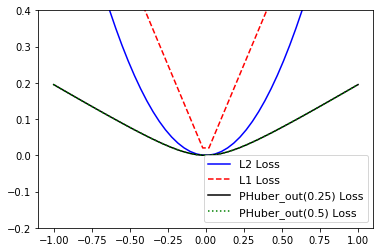

In [188]:
x_array = sess.run(x)
plt.plot(x_array,mL2_out,'b-',label='L2 Loss')
plt.plot(x_array,L1_out,'r--',label='L1 Loss')
plt.plot(x_array,PHuber_out,'k-',label='PHuber_out(0.25) Loss')
plt.plot(x_array,PHuber_2_out,'g:',label='PHuber_out(0.5) Loss')
plt.ylim(-0.2,0.4)
plt.legend(loc='lower right',prop={'size':11})

* 分类算法损失函数

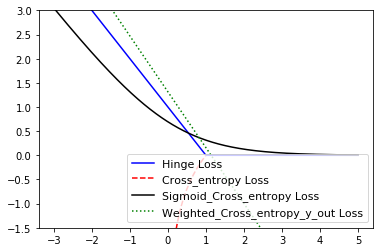

In [198]:
x_array = sess.run(x)
plt.plot(x_array,Hinge_y_out,'b-',label='Hinge Loss')
plt.plot(x_array,Cross_entropy_out,'r--',label='Cross_entropy Loss')
plt.plot(x_array,Sigmoid_Cross_entropy_y_out,'k-',label='Sigmoid_Cross_entropy Loss')
plt.plot(x_array,Weighted_Cross_entropy_y_out,'g:',label='Weighted_Cross_entropy_y_out Loss')
plt.ylim(-1.5,3)
plt.legend(loc='lower right',prop={'size':11})

## TensorFlow 实现反向传播

In [457]:
x = np.random.normal(1, 0.1, 100)
y = np.repeat(10.,100)

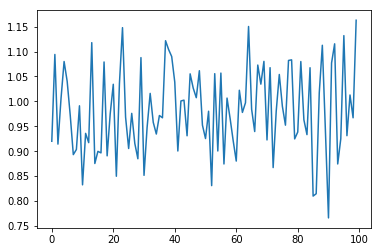

In [458]:
plt.plot(x)

* 创建占位符

In [459]:
x_data = tf.placeholder(shape=[1],dtype=tf.float32)
y_taget = tf.placeholder(shape=[1],dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1]))

* 乘法

In [460]:
output = tf.multiply(x_data,A)

* Loss

In [461]:
loss = tf.square(output-y_taget)

* 运行前记得初始化

In [462]:
init = tf.initialize_all_variables()
sess.run(init)

 * 声明变量优化器 
 
大部分优化器算法需要知道每步迭代的步长，这距离是由学习率控制的。如果学习率太小，算法可能耗时很长才能收敛；</p>
如果学习率太大，机器学习算法可能不会收敛。相应地导致梯度消失和梯度爆炸的问题。

In [463]:
opt = tf.train.GradientDescentOptimizer(learning_rate=0.02)
train_step = opt.minimize(loss)

* 训练算法，迭代x，y 更新A

In [464]:
epoch=100
rand_loss = []
for i in range(epoch):
    rand_index = np.random.choice(100)
    rand_x = [x[rand_index]]
    rand_y = [y[rand_index]]
    sess.run(train_step,feed_dict={x_data:rand_x,y_taget:rand_y})
    if (i+1)%5 ==0:
        train_loss =  sess.run(loss,feed_dict={x_data:rand_x,y_taget:rand_y})
        print('epoch:{} \t A={}\t  Loss={}'\
     .format(str(i+1),str(sess.run(A)[0]),str(sess.run(loss,feed_dict={x_data:rand_x,y_taget:rand_y})[0])))
        rand_loss.append(train_loss)

epoch:5 	 A=2.1651263	  Loss=64.28085
epoch:10 	 A=3.5697696	  Loss=39.7791
epoch:15 	 A=4.7373223	  Loss=29.839016
epoch:20 	 A=5.6984487	  Loss=19.924246
epoch:25 	 A=6.495362	  Loss=10.519499
epoch:30 	 A=7.146263	  Loss=9.483592
epoch:35 	 A=7.632085	  Loss=2.4796662
epoch:40 	 A=8.110723	  Loss=8.46154
epoch:45 	 A=8.391664	  Loss=0.12113822
epoch:50 	 A=8.792226	  Loss=2.2434902
epoch:55 	 A=8.976546	  Loss=0.82670826
epoch:60 	 A=9.172077	  Loss=3.8897436
epoch:65 	 A=9.3713875	  Loss=0.4298596
epoch:70 	 A=9.478368	  Loss=0.84907824
epoch:75 	 A=9.498564	  Loss=1.2905385
epoch:80 	 A=9.514247	  Loss=0.10472054
epoch:85 	 A=9.618047	  Loss=0.38151866
epoch:90 	 A=9.782707	  Loss=1.6577383
epoch:95 	 A=9.775305	  Loss=0.29966816
epoch:100 	 A=9.722341	  Loss=1.3455974


### 一个简单的分类算法的例子：

我们试图找到一个优化的转化方式A，它可以把2个正态分布转化到原点,sigmoid函数将正态分布分割成不同的两类。

In [382]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

* 在N(-1,1),N(3,1)）生成数据。同时也生成目标标签，占位符和偏差变量A

In [383]:
x = np.concatenate((np.random.normal(-1, 1., 50),np.random.normal(3, 1, 50)))
y = np.concatenate((np.repeat(0.,50),np.repeat(1.,50)))
x_data = tf.placeholder(shape=[1],dtype=tf.float32)
y_taget = tf.placeholder(shape=[1],dtype=tf.float32)
A = tf.Variable(tf.random_normal(mean=10,shape=[1]))
# 初始化在10附件，可以看到数据是怎么从10收敛到理论值的 -1 的

([<matplotlib.lines.Line2D at 0x382163c8>],
 [<matplotlib.lines.Line2D at 0x38216860>])

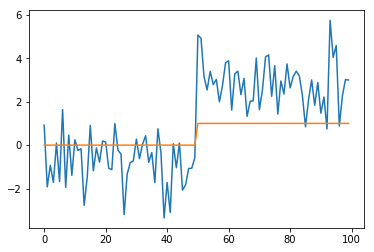

In [384]:
plt.plot(x),plt.plot(y)

In [385]:
output = tf.add(x_data,A)

In [386]:
output_expanded = tf.expand_dims(output,0)
y_expanded = tf.expand_dims(y_taget,0)

* 损失函数和优化器

In [392]:
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=output_expanded,labels=y_expanded)
opt = tf.train.GradientDescentOptimizer(0.05)
train_step = opt.minimize(loss)

* 初始化

In [389]:
init = tf.initialize_all_variables()
sess.run(init)

开始训练

In [390]:
epoch=2000
for i in range(epoch):
    rand_index = np.random.choice(100)
    rand_x = [x[rand_index]]
    rand_y = [y[rand_index]]
    sess.run(train_step,feed_dict={x_data:rand_x,y_taget:rand_y})
    if (i+1)%250 ==0:
        print('epoch:{} \t A={}\t  Loss={}'\
     .format(str(i+1),str(sess.run(A)[0]),str(sess.run(loss,feed_dict={x_data:rand_x,y_taget:rand_y})[0])))

epoch:250 	 A=2.068008	  Loss=[0.00040356]
epoch:500 	 A=-0.4927037	  Loss=[0.07311753]
epoch:750 	 A=-0.9760956	  Loss=[0.24103089]
epoch:1000 	 A=-0.9882837	  Loss=[0.13702929]
epoch:1250 	 A=-0.96414804	  Loss=[0.26021218]
epoch:1500 	 A=-1.0328348	  Loss=[0.06199799]
epoch:1750 	 A=-0.97552115	  Loss=[0.12095398]
epoch:2000 	 A=-1.0568621	  Loss=[0.3250265]


### 工作原理总结：
* 生成数据
* 初始化占位符和变量
* 创建损失函数
* 定义一个优化器算法
* 最后，通过随机数据样本进行迭代，更新变量

## 延伸学习

* 小学习率
收敛慢，但结果精确，若算法不稳定，先降低学习率。
* 大学习率
结果不精确，但是收敛快，若算法收敛太慢，可提高学习率。


##  Tensorflow 实现随机批量训练数据

* base

In [448]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
sess = tf.Session()

* 声明批量的大小

In [449]:
batch_size = 20

* 接着声明数据X,Y
* 占位符和变量

注意 不同的是，这里需要改变占位符的形状，第一个维度为None，第二个维度是批量训练中的数据量。</p>
我们能显式的设置为维度20，也能设置为None。

In [486]:
x = np.random.normal(1, 0.1, 100)
y = np.repeat(10.,100)
x_data = tf.placeholder(shape=[None,1],dtype=tf.float32)
y_taget = tf.placeholder(shape=[None,1],dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))

现在在矩阵中加入乘法
注意矩阵的乘法与不满足交换率，所以顺序一定要正确。

In [451]:
output = tf.matmul(x_data,A)

改变损失函数，因为批量训练是的损失函数是每个数据点L2损失值的平均值。调用reduce_mean即可

In [452]:
loss = tf.reduce_mean(tf.square(output-y_taget))

声明优化器

In [453]:
opt = tf.train.GradientDescentOptimizer(learning_rate=0.02)
train_step = opt.minimize(loss)

初始化

In [454]:
init = tf.initialize_all_variables()
sess.run(init)

随机批量训练数据

In [455]:
epoch=100
loss_bath=[]
for i in range(epoch):
    rand_index = np.random.choice(100, size=batch_size)
    rand_x = np.transpose([x[rand_index]])
    rand_y = np.transpose([y[rand_index]])
    sess.run(train_step,feed_dict={x_data:rand_x,y_taget:rand_y})
    if (i+1)%5 ==0:
        train_loss =  sess.run(loss,feed_dict={x_data:rand_x,y_taget:rand_y})
        print('epoch:{} \t A={}\t  Loss={}'\
     .format(str(i+1),str(sess.run(A)[0][0]),str(train_loss)))
        loss_bath.append(train_loss)

epoch:5 	 A=1.4986801	  Loss=72.33487
epoch:10 	 A=3.057093	  Loss=48.5912
epoch:15 	 A=4.3335266	  Loss=32.07303
epoch:20 	 A=5.3712373	  Loss=21.875168
epoch:25 	 A=6.2181606	  Loss=14.929753
epoch:30 	 A=6.9005	  Loss=8.571302
epoch:35 	 A=7.462985	  Loss=7.792093
epoch:40 	 A=7.907878	  Loss=5.07723
epoch:45 	 A=8.300867	  Loss=5.2643566
epoch:50 	 A=8.603955	  Loss=3.4052253
epoch:55 	 A=8.846223	  Loss=2.0098286
epoch:60 	 A=9.030557	  Loss=2.3465705
epoch:65 	 A=9.209191	  Loss=2.2863004
epoch:70 	 A=9.321079	  Loss=0.9253419
epoch:75 	 A=9.439071	  Loss=1.0758566
epoch:80 	 A=9.530076	  Loss=1.0556087
epoch:85 	 A=9.621479	  Loss=0.7482683
epoch:90 	 A=9.666402	  Loss=1.9459679
epoch:95 	 A=9.697556	  Loss=1.3240162
epoch:100 	 A=9.724102	  Loss=1.1594733


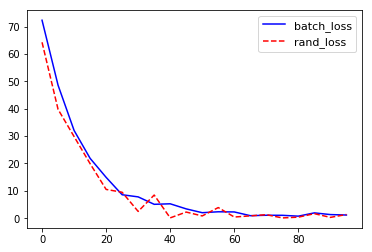

In [467]:
plt.plot(range(0,100,5),loss_bath,'b-',label='batch_loss')
plt.plot(range(0,100,5),rand_loss,'r--',label='rand_loss')
plt.legend(loc='upper right',prop={'size':11})

随机训练损失更不规则，批量训练损失更为平滑
* 随机训练：
脱离局部最小，一般需要更多次的迭代才收敛
* 批量训练
快速得到最小损失，耗费更多计算资源


# Tensorflow 实现分类器
结合上面知识，创建一个iris数据集的分类器

In [58]:
import tensorflow as tf
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
sess = tf.Session()

导入iris数据集<p>
根据目标数据是否为山鸢尾将其转化成1或者0<p>
由于iris数据集将山鸢尾标记为0，我们将其从0置为，同时其他物种标记为0<p>
本次训练只使用两种特征：花瓣长度和花瓣宽度</p>

In [59]:
iris = datasets.load_iris()
binary_target = np.array([1. if x==0 else 0. for x in iris.target ])
iris_2d = np.array([[x[2], x[3]] for x in iris.data])

声明批量训练大小、数据占位符和模型变量。<p>
float32降低了字节数，提高了算法性能

In [60]:
batch_size = 20
x1_data = tf.placeholder(shape=[None, 1],dtype=tf.float32)
x2_data = tf.placeholder(shape=[None, 1],dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1],dtype=tf.float32)
w = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

output = x1_data-(tf.matmul(x2_data,w)+b)

In [61]:
output = tf.subtract(x1_data,tf.add(tf.matmul(x2_data,w),b))

损失函数

In [62]:
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=output,labels=y_target)

优化器

In [63]:
opt = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_step = opt.minimize(loss)

初始化变量

In [64]:
init = tf.initialize_all_variables()
sess.run(init)

分批次训练

In [65]:
epoch=1000
for i in range(epoch):
    rand_index = np.random.choice(len(iris), size=batch_size)
    rand_x = iris_2d[rand_index]
    
    rand_x1 = np.array([[x[0]] for x in rand_x])
    rand_x2 = np.array([[x[1]] for x in rand_x])                    
    rand_y = np.array([[y] for y in binary_target[rand_index]])
    sess.run(train_step,feed_dict={x1_data:rand_x1,x2_data:rand_x2,y_target:rand_y})
    if (i+1)%200 ==0:
        print('epoch:{} \t A={}\t  b={}'\
     .format(str(i+1),str(sess.run(w)[0][0]),str(sess.run(b)[0][0])))
       

epoch:200 	 A=-0.32899284	  b=-3.8960297
epoch:400 	 A=-0.460128	  b=-4.551704
epoch:600 	 A=-0.5373847	  b=-4.9379864
epoch:800 	 A=-0.5923178	  b=-5.212651
epoch:1000 	 A=-0.6349888	  b=-5.4260073


## 可视化

In [66]:
[[A]] = sess.run(w)
[[B]] = sess.run(b)
x = np.linspace(0, 3, num=50)
ablineValues = []
for i in x:
    ablineValues.append(A*i+B)
#山鸢尾
setosa_X = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==1]
setosa_Y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==1]
#其他花
other_X = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==0]
other_Y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==0]

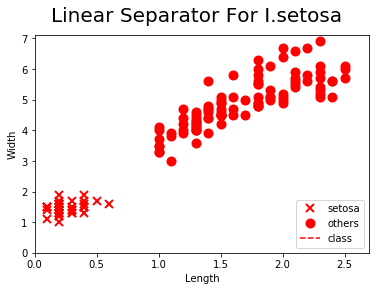

In [67]:
plt.plot(setosa_X,setosa_Y,'rx',ms=8,mew=2,label='setosa')
plt.plot(other_X,other_Y,'ro',ms=8,mew=2,label='others')
plt.plot(x,ablineValues,'r--',label='class')
plt.xlim([0.0,2.7])
plt.ylim([0.0,7.1])
plt.suptitle('Linear Separator For I.setosa',fontsize=20)
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend(loc='lower right')
plt.show()

# 实现对模型的评估：

分割数据集，训练数据集和测试数据集即可完成